In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math

# I. Nettoyage

## A. Consommateur

In [2]:
df_conso = pd.read_csv(r'C:\Users\thoma\customers.csv')
df_conso

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
df_conso.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_5263,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [4]:
df_conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
df_conso['client_id'].str.startswith('c_').unique()

array([ True, False])

In [6]:
df_conso[~ df_conso['client_id'].str.startswith('c_')]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


- clé primaire: client_id
- pas de NaN
- pas de doublon

## B. Produits

In [7]:
df_prod = pd.read_csv(r'C:\Users\thoma\products.csv')
df_prod

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
df_prod.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_2219,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [9]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
df_prod['categ'].unique()

array([0, 1, 2], dtype=int64)

- clé primaire: id_prod
- pas de NaN, doublon

## C. Transactions

In [11]:
df_transa = pd.read_csv(r'C:\Users\thoma\transactions.csv')
df_transa

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [12]:
df_transa.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [13]:
df_transa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
list_test = df_transa[~ df_transa['client_id'].str.startswith('c_')]
list_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [15]:
df_transa = df_transa[~df_transa.index.isin(list_test.index)]
df_transa

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [16]:
df_transa[df_transa.duplicated()]

,id_prod,date,session_id,client_id


In [17]:
df_transa[~ df_transa['client_id'].str.startswith('c_')]

,id_prod,date,session_id,client_id


**Vérification qu'il ne reste plus de doublons dans le DF**

Info:
- clé primaire: index ==> crée nouvelle colonne ID (pas besoin)
- 6 dernier chiffre: micro seconde
- session_id: session de connection

A faire:
- doublon: soit réelle doublon, soit des quantité multiples ds une meme transaction
- tendance du CA: moyenne mobile: rolling window python (google)

Question:
- date: 2022, 2023 ? 

## D. Agrégation

In [18]:
df_transa["date"] = pd.to_datetime(df_transa["date"])

<ipython-input-18-b0cd8d2aa983>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transa["date"] = pd.to_datetime(df_transa["date"])


In [19]:
df_transa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


#### Agrégation

In [20]:
df_intermediaire = pd.merge(df_transa, df_prod, how='left', on="id_prod")
df_intermediaire

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0
...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0


In [21]:
df_finale = pd.merge(df_intermediaire, df_conso, how='left', on="client_id")
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


#### Gestion des NaN 'price'

In [22]:
df_finale[df_finale['price'] <= 0]

,id_prod,date,session_id,client_id,price,categ,sex,birth


In [23]:
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB


**Données manquantes pour col: 'price' et 'categ'.  
Certaines transactions sont relier à des produits inconnus(pas présents dans la table 'Produit').**

#### Determiner prix et categorie des produits inconnus:

In [24]:
listPrixNan = df_finale[df_finale['price'].isna()]
listPrixNan

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986


In [25]:
listCateg = []
for x in listPrixNan['id_prod']:
    listCateg.append(x[0])
listCateg

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [26]:
listPrixNan['categ'] = listCateg
listPrixNan

<ipython-input-26-8b0d9d2ef99f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listPrixNan['categ'] = listCateg


,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,0,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,0,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,0,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,0,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,0,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,0,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,0,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,0,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,0,m,1986


In [27]:
categ0 = df_prod[df_prod['categ'] == 0]
categ0

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0
...,...,...,...
3280,0_1314,20.63,0
3281,0_607,14.99,0
3283,0_146,17.14,0
3284,0_802,11.22,0


In [28]:
categ0['price'].mean()

11.72728020788248

In [29]:
listPrixNan['price'] = categ0['price'].mean()
listPrixNan

<ipython-input-29-b898437cc07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listPrixNan['price'] = categ0['price'].mean()


,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.72728,0,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.72728,0,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.72728,0,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.72728,0,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.72728,0,m,1973
...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.72728,0,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.72728,0,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.72728,0,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11.72728,0,m,1986


In [30]:
listPrixNan['id_prod'].unique()

array(['0_2245'], dtype=object)

In [31]:
df_finale.iloc[10103]

id_prod                           0_2245
date          2022-07-23 09:24:14.133889
session_id                      s_242482
client_id                         c_6713
price                                NaN
categ                                NaN
sex                                    f
birth                               1963
Name: 10103, dtype: object

#### Modifier 'price' et 'categ' dans df_finale

In [32]:
df_finale['price'] = df_finale['price'].fillna(categ0['price'].mean())

In [33]:
df_finale['price'].isna().sum()

0

In [34]:
df_finale['categ'] = df_finale['categ'].fillna(0)

In [35]:
df_finale['categ'].isna().sum()

0

# II. Analyse: 1er partie

## A. Chiffre d'affaire

### 1. Evolution du Chiffre d'affaire

In [36]:
df_finale["birth"] = pd.to_datetime(df_finale["birth"], format = "%Y")

In [37]:
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 46.6+ MB


#### Ajout des colonnes: Année, Mois, Jours

In [38]:
df_finale['Annee'] = pd.DatetimeIndex(df_finale['date']).year
df_finale['Mois'] = pd.DatetimeIndex(df_finale['date']).month
df_finale['Jour'] = pd.DatetimeIndex(df_finale['date']).day
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01,2022,5,20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01,2022,2,2
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968-01-01,2022,6,18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01,2023,1,11
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01,2022,1,15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01,2022,3,19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01,2022,12,20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01,2021,7,16


In [39]:
df_finale_cat0 = df_finale[df_finale['categ'] == 0]
df_finale_cat1 = df_finale[df_finale['categ'] == 1]
df_finale_cat2 = df_finale[df_finale['categ'] == 2]

In [40]:
annee2021 = df_finale.loc[(df_finale['Annee'] == 2021)]
annee2021['Mois'].unique()

array([ 6, 11,  9,  8, 12,  5,  7,  3, 10,  4], dtype=int64)

### 2. Regroupement CA: par jour, par mois

#### a. Variation du CA par jour

In [41]:
ca_jour = df_finale.groupby(pd.Grouper(key = 'date', axis = 0, freq = 'D', sort = True)).sum()
ca_jour['Jours2']= ca_jour.index.day
ca_jour['Mois2']= ca_jour.index.month
ca_jour['Anne2']= ca_jour.index.year

In [42]:
ca_jour.reset_index(inplace = True)

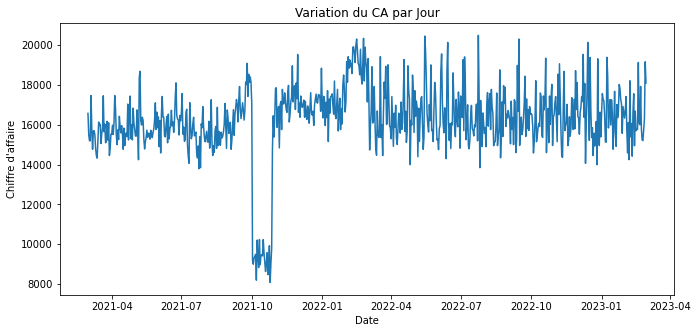

In [43]:
date = ca_jour['date']
CA = ca_jour['price']

fig = plt.figure(figsize =(11, 5))
plt.plot(date, CA)
plt.title('Variation du CA par Jour')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaire')
plt.show()

#### b. Variation du CA par mois

In [44]:
ca_mois = df_finale.groupby(pd.Grouper(key = 'date', axis = 0, freq = 'M', sort = True)).sum()
ca_mois['Mois2']= ca_mois.index.month
ca_mois['Anne2']= ca_mois.index.year

In [45]:
ca_mois.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-03-31 to 2023-02-28
Freq: M
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   24 non-null     float64
 1   categ   24 non-null     float64
 2   Annee   24 non-null     int64  
 3   Mois    24 non-null     int64  
 4   Jour    24 non-null     int64  
 5   Mois2   24 non-null     int64  
 6   Anne2   24 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 1.5 KB


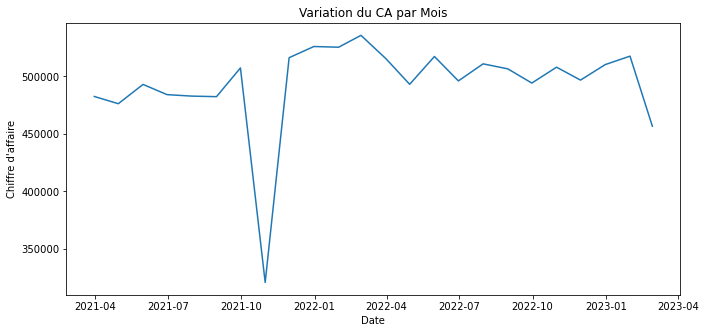

In [46]:
ca_mois.reset_index(inplace = True)
date = ca_mois['date']
CA = ca_mois['price']

fig = plt.figure(figsize =(11, 5))
plt.plot(date, CA)
plt.title('Variation du CA par Mois')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaire')
plt.show()

#### c. Variation de la moyenne du CA

In [47]:
ca_rolling_mois = ca_mois['price'].rolling(window = 3, center = False).mean()

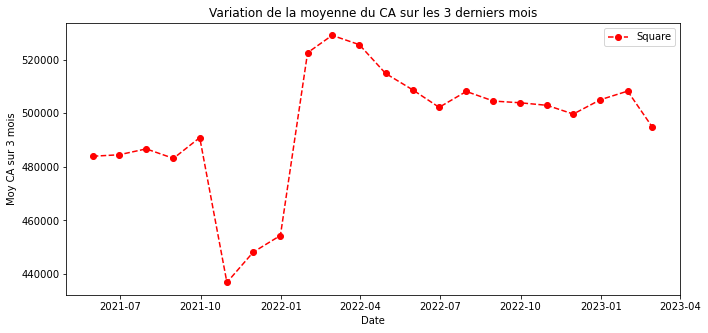

In [48]:
fig = plt.figure(figsize =(11, 5))
plt.plot(date, ca_rolling_mois, marker='o', linestyle='--', color='r', label='Square')
plt.xlim(datetime.date(2021, 5, 1), datetime.date(2023, 4, 1) )
plt.xlabel('Date')
plt.ylabel('Moy CA sur 3 mois') 
plt.title('Variation de la moyenne du CA sur les 3 derniers mois')
plt.legend()
plt.show()

On constate:
- une variation relativement stable entre 480k et 520k.  
- une chute notable en 2023-02

#### d. Focus sur octobre 2021

In [49]:
ca_jour.loc[(ca_jour['Mois2'] ==10) & (ca_jour['Anne2'] == 2021)]

,date,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
214,2021-10-01,17058.34000,420.0,2111945,10450,1045,1,10,2021
215,2021-10-02,9182.13000,56.0,1392469,6890,1378,2,10,2021
216,2021-10-03,8993.05000,62.0,1372259,6790,2037,3,10,2021
217,2021-10-04,9303.13456,76.0,1295461,6410,2564,4,10,2021
218,2021-10-05,9390.46000,76.0,1277272,6320,3160,5,10,2021
219,2021-10-06,9490.69000,52.0,1471288,7280,4368,6,10,2021
220,2021-10-07,8191.08000,52.0,1259083,6230,4361,7,10,2021
221,2021-10-08,10207.35000,88.0,1440973,7130,5704,8,10,2021
222,2021-10-09,9425.36000,70.0,1364175,6750,6075,9,10,2021
223,2021-10-10,8825.65000,58.0,1271209,6290,6290,10,10,2021


In [50]:
ca_jour_cat0 = df_finale_cat0.groupby(pd.Grouper(key = 'date', axis = 0, freq = 'D', sort = True)).sum()
ca_jour_cat1 = df_finale_cat1.groupby(pd.Grouper(key = 'date', axis = 0, freq = 'D', sort = True)).sum()
ca_jour_cat2 = df_finale_cat2.groupby(pd.Grouper(key = 'date', axis = 0, freq = 'D', sort = True)).sum()
ca_jour_cat0['Jours2']= ca_jour_cat0.index.day
ca_jour_cat0['Mois2']= ca_jour_cat0.index.month
ca_jour_cat0['Anne2']= ca_jour_cat0.index.year
ca_jour_cat1['Jours2']= ca_jour_cat1.index.day
ca_jour_cat1['Mois2']= ca_jour_cat1.index.month
ca_jour_cat1['Anne2']= ca_jour_cat1.index.year
ca_jour_cat2['Jours2']= ca_jour_cat2.index.day
ca_jour_cat2['Mois2']= ca_jour_cat2.index.month
ca_jour_cat2['Anne2']= ca_jour_cat2.index.year

#### Analyse des différentes catégories

In [51]:
ca_jour_cat0.loc[(ca_jour_cat0['Mois2'] ==10) & (ca_jour_cat0['Anne2'] == 2021)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2021-10-01,6950.50000,0.0,1339923,6630,663,1,10,2021
2021-10-02,7141.01000,0.0,1335881,6610,1322,2,10,2021
2021-10-03,6786.57000,0.0,1309608,6480,1944,3,10,2021
2021-10-04,6557.05456,0.0,1218663,6030,2412,4,10,2021
2021-10-05,6357.91000,0.0,1200474,5940,2970,5,10,2021
2021-10-06,7546.58000,0.0,1418742,7020,4212,6,10,2021
2021-10-07,6404.01000,0.0,1206537,5970,4179,7,10,2021
2021-10-08,7069.53000,0.0,1352049,6690,5352,8,10,2021
2021-10-09,6808.69000,0.0,1293440,6400,5760,9,10,2021


In [52]:
ca_jour_cat1.loc[(ca_jour_cat1['Mois2'] ==10) & (ca_jour_cat1['Anne2'] == 2021)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2021-10-01,7003.79,344.0,695224,3440,344,1,10,2021
2021-10-02,0.00,0.0,0,0,0,2,10,2021
2021-10-03,0.00,0.0,0,0,0,3,10,2021
2021-10-04,0.00,0.0,0,0,0,4,10,2021
2021-10-05,0.00,0.0,0,0,0,5,10,2021
2021-10-06,0.00,0.0,0,0,0,6,10,2021
2021-10-07,0.00,0.0,0,0,0,7,10,2021
2021-10-08,0.00,0.0,0,0,0,8,10,2021
2021-10-09,0.00,0.0,0,0,0,9,10,2021


In [53]:
ca_jour_cat2.loc[(ca_jour_cat2['Mois2'] ==10) & (ca_jour_cat2['Anne2'] == 2021)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2021-10-01,3104.05,76.0,76798,380,38,1,10,2021
2021-10-02,2041.12,56.0,56588,280,56,2,10,2021
2021-10-03,2206.48,62.0,62651,310,93,3,10,2021
2021-10-04,2746.08,76.0,76798,380,152,4,10,2021
2021-10-05,3032.55,76.0,76798,380,190,5,10,2021
2021-10-06,1944.11,52.0,52546,260,156,6,10,2021
2021-10-07,1787.07,52.0,52546,260,182,7,10,2021
2021-10-08,3137.82,88.0,88924,440,352,8,10,2021
2021-10-09,2616.67,70.0,70735,350,315,9,10,2021


On constate **une baisse significative des vente de la catégorie 1.**

On peut donc conclure que la baisse du CA en 2021-10, peut s'expliquer **par une absence de donné et/ou un arrêt des ventes pour la catégorie 1 entre le 02/10 et le 27/10.** 

#### e. Focus sur février 2023

In [54]:
ca_jour.loc[(ca_jour['Mois2'] ==2) & (ca_jour['Anne2'] == 2023)]

,date,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
702,2023-02-01,16718.43000,456.0,1776194,1756,878,1,2,2023
703,2023-02-02,17423.19000,462.0,1703366,1684,1684,2,2,2023
704,2023-02-03,15681.27728,415.0,1703366,1684,2526,3,2,2023
705,2023-02-04,14586.31000,381.0,1729665,1710,3420,4,2,2023
706,2023-02-05,16111.41000,443.0,1889482,1868,4670,5,2,2023
707,2023-02-06,14247.34728,338.0,1800470,1780,5340,6,2,2023
708,2023-02-07,18217.02000,405.0,1903643,1882,6587,7,2,2023
709,2023-02-08,15397.83000,378.0,1624469,1606,6424,8,2,2023
710,2023-02-09,16065.94000,363.0,1883413,1862,8379,9,2,2023
711,2023-02-10,14424.35728,392.0,1549618,1532,7660,10,2,2023


#### Analyse des différentes catégories

In [55]:
ca_jour_cat0.loc[(ca_jour_cat0['Mois2'] ==2) & (ca_jour_cat0['Anne2'] == 2023)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2023-02-01,5156.63000,0.0,971040,960,480,1,2,2023
2023-02-02,4693.32000,0.0,932603,922,922,2,2,2023
2023-02-03,4859.96728,0.0,964971,954,1431,3,2,2023
2023-02-04,5401.51000,0.0,1053983,1042,2084,4,2,2023
2023-02-05,5676.46000,0.0,1076236,1064,2660,5,2,2023
2023-02-06,5953.91728,0.0,1203685,1190,3570,6,2,2023
2023-02-07,6585.26000,0.0,1229984,1216,4256,7,2,2023
2023-02-08,5143.52000,0.0,981155,970,3880,8,2,2023
2023-02-09,6596.59000,0.0,1250214,1236,5562,9,2,2023


In [56]:
ca_jour_cat1.loc[(ca_jour_cat0['Mois2'] ==2) & (ca_jour_cat0['Anne2'] == 2023)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2023-02-01,7000.34,340.0,687820,680,340,1,2,2023
2023-02-02,6521.95,300.0,606900,600,600,2,2,2023
2023-02-03,6657.42,315.0,637245,630,945,3,2,2023
2023-02-04,5880.34,287.0,580601,574,1148,4,2,2023
2023-02-05,7359.97,361.0,730303,722,1805,5,2,2023
2023-02-06,5210.84,252.0,509796,504,1512,6,2,2023
2023-02-07,5388.52,261.0,528003,522,1827,7,2,2023
2023-02-08,5286.03,258.0,521934,516,2064,8,2,2023
2023-02-09,5386.59,263.0,532049,526,2367,9,2,2023


In [57]:
ca_jour_cat2.loc[(ca_jour_cat0['Mois2'] ==2) & (ca_jour_cat0['Anne2'] == 2023)]

,price,categ,Annee,Mois,Jour,Jours2,Mois2,Anne2
date,,,,,,,,
2023-02-01,4561.46,116.0,117334,116,58,1,2,2023
2023-02-02,6207.92,162.0,163863,162,162,2,2,2023
2023-02-03,4163.89,100.0,101150,100,150,3,2,2023
2023-02-04,3304.46,94.0,95081,94,188,4,2,2023
2023-02-05,3074.98,82.0,82943,82,205,5,2,2023
2023-02-06,3082.59,86.0,86989,86,258,6,2,2023
2023-02-07,6243.24,144.0,145656,144,504,7,2,2023
2023-02-08,4968.28,120.0,121380,120,480,8,2,2023
2023-02-09,4082.76,100.0,101150,100,450,9,2,2023


On constate qu'il n'y a **pas de variation notable des ventes dans les différentes catégories.**  
A ce stade, **nous n'avons pas d'explication de cette baisse.**

## B. Références

### 1. Top

#### a. Produits rapportant le plus de CA

In [58]:
top5 = df_finale.groupby('id_prod').sum()[['price']].sum(axis=1).sort_values(ascending=False).head(5)
top5 = pd.DataFrame(top5)
top5

,0
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86


#### b. Produits les plus vendu

In [59]:
top5_vol = df_finale.groupby('id_prod').count()[['price']].sum(axis=1).sort_values(ascending=False).head(5)
top5_vol= pd.DataFrame(top5_vol)
top5_vol

,0
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096


### 2. Flop

#### a. Pour les porduits vendus

In [60]:
flop5 = df_finale.groupby('id_prod').sum()[['price']].sum(axis=1).sort_values(ascending=True).head()
flop5 = pd.DataFrame(flop5)
flop5

,0
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_541,1.99
0_807,1.99


#### b. Pour les produits non-vendu:

#### Méthode 1:

In [61]:
liste_prod = set(df_prod['id_prod'].unique())

liste_prod_transa = set(df_finale['id_prod'].unique())

In [62]:
list_flop = []
for x in liste_prod:
    if x not in liste_prod_transa:
        list_flop.append(x)
list_flop = list( dict.fromkeys(list_flop)) #convertir en dictionnaire puis liste pr enlever les doublons
list_flop

['0_1800',
 '0_1624',
 '2_72',
 '0_1025',
 'T_0',
 '2_87',
 '0_1780',
 '0_1119',
 '1_394',
 '0_1014',
 '0_322',
 '0_1062',
 '0_510',
 '2_86',
 '0_1645',
 '0_299',
 '0_1016',
 '0_1318',
 '0_2308',
 '0_310',
 '1_0',
 '0_1620']

#### Méthode 2:

In [63]:
liste_prod - liste_prod_transa

{'0_1014',
 '0_1016',
 '0_1025',
 '0_1062',
 '0_1119',
 '0_1318',
 '0_1620',
 '0_1624',
 '0_1645',
 '0_1780',
 '0_1800',
 '0_2308',
 '0_299',
 '0_310',
 '0_322',
 '0_510',
 '1_0',
 '1_394',
 '2_72',
 '2_86',
 '2_87',
 'T_0'}

In [64]:
df_finale['id_prod'].nunique()

3266

In [65]:
df_prod['id_prod'].nunique()

3287

#### c. Produits les moins vendu

In [66]:
flop = df_finale.groupby('id_prod').count()[['price']].sum(axis=1).sort_values(ascending=True)
flop.head()

id_prod
0_549     1
0_2201    1
2_23      1
0_1284    1
0_1683    1
dtype: int64

### 3. Répartition par catégorie

#### a. Par CA

In [67]:
rep_categorie = df_finale.groupby('categ').sum()[['price']]
rep_categorie

,price
categ,
0.0,4.422323e+06
1.0,4.653723e+06
2.0,2.780275e+06


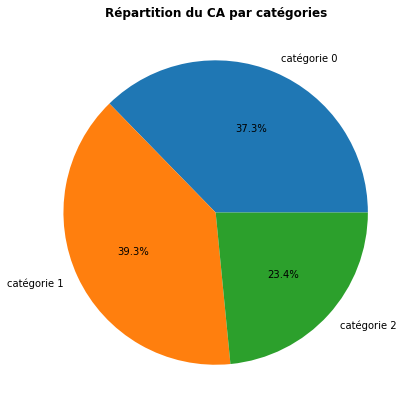

In [68]:
etiquettes = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(15, 7))
plt.pie(x= rep_categorie['price'], labels = etiquettes, autopct='%1.1f%%')
plt.title('Répartition du CA par catégories', fontweight ="bold")
plt.show()

#### b. Par nombre de vente

In [69]:
rep_categorie_vol = df_finale.groupby('categ').count()[['price']]
rep_categorie_vol

,price
categ,
0.0,415680
1.0,227169
2.0,36483


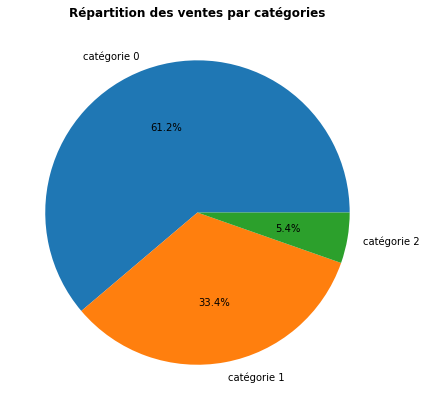

In [70]:
etiquettes = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(15, 7))
plt.pie(x= rep_categorie_vol['price'], labels = etiquettes, autopct='%1.1f%%')
plt.title('Répartition des ventes par catégories', fontweight ="bold")
plt.show()

## C. Profils Client

### 1. Âge

#### a. Mise en place du DF

#### Méthode 1:

In [71]:
df_finale['Age'] = (df_finale['date'] - df_finale['birth'])/365
df_finale['Age'] = df_finale['Age'] / np.timedelta64(1, 'D')
df_finale['Age'] = df_finale['Age'].apply(np.floor)
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01,2022,5,20,36.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01,2022,2,2,34.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968-01-01,2022,6,18,54.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24,21.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01,2023,1,11,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01,2022,1,15,71.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01,2022,3,19,45.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01,2022,12,20,34.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01,2021,7,16,35.0


**Méthode 2:** 


In [72]:
df_finale['date'] = df_finale['date'].astype(str)

df_finale['date2'] = df_finale['date'].str[:4]
df_finale['date2'] = df_finale['date2'].astype(int)

df_finale['birth'] =  df_finale['birth'].astype(str)
df_finale['birth2'] = df_finale['birth'].str[:4]
df_finale['birth2'] = df_finale['birth2'].astype(int)

df_finale['Age2'] = df_finale['date2'] - df_finale['birth2']
df_finale

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2,Age2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01,2022,5,20,36.0,2022,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01,2022,2,2,34.0,2022,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968-01-01,2022,6,18,54.0,2022,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24,21.0,2021,2000,21
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01,2023,1,11,43.0,2023,1980,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01,2022,1,15,71.0,2022,1951,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01,2022,3,19,45.0,2022,1977,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01,2022,12,20,34.0,2022,1988,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01,2021,7,16,35.0,2021,1986,35


#### b. Analyse des âges:

**En valeur  du CA:**

In [73]:
rep_age_CA = df_finale.groupby('Age').sum()
rep_age_CA

,price,categ,Annee,Mois,Jour,date2,birth2,Age2
Age,,,,,,,,
17.0,237732.88000,6814.0,11699569,42136,91569,11699569,11601156,98413
18.0,382482.12000,11241.0,19480054,63024,155512,19480054,19306770,173284
19.0,224287.11728,6554.0,11069996,30537,87316,11069996,10966118,103878
20.0,178038.04456,5221.0,8976396,28763,70733,8976396,8887677,88719
21.0,172492.71728,4944.0,8741725,27991,68855,8741725,8650994,90731
...,...,...,...,...,...,...,...,...
90.0,4269.15000,155.0,515565,1570,4080,515565,492638,22927
91.0,3450.30000,116.0,422541,1236,3017,422541,403533,19008
92.0,3245.80000,127.0,390193,1302,2912,390193,372449,17744


**Représentation graphique**

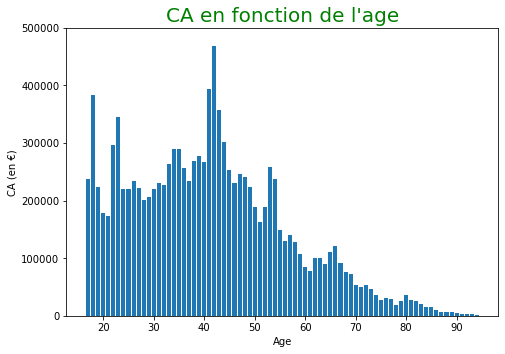

In [74]:
# Préparation de la figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Affichage des données
ax.bar(rep_age_CA.index, rep_age_CA['price'])
plt.xlabel('Age')
plt.ylabel('CA (en €)')
plt.title('CA en fonction de l\'age', fontsize=20, color="green")

ax = plt.gca() 
ax.set_ylim([0, 500000]) # OU x1,x2,y1,y2 = plt.axis()  plt.axis((x1,x2,25,250))
plt.show()  

#### Top10 des âges

In [75]:
top10_age_CA = rep_age_CA['price'].sort_values(ascending=False).head(10)
top10_age_CA = pd.DataFrame(top10_age_CA)
top10_age_CA = top10_age_CA.rename({'price': 'CA'}, axis=1)
top10_age_CA

,CA
Age,
42.0,467773.528242
41.0,394214.486401
18.0,382482.120000
43.0,356564.686483
23.0,345717.110000
44.0,301720.347362
22.0,297068.207280
34.0,289570.976401
35.0,288939.195522


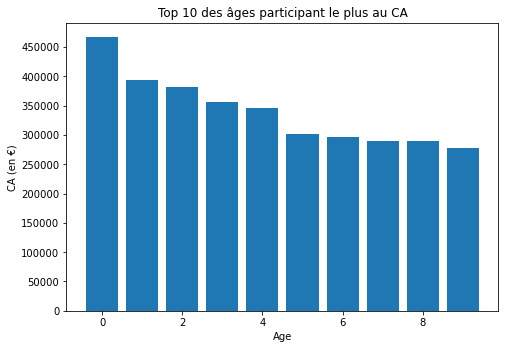

In [76]:
x_pos = np.arange(len(top10_age_CA.index))
height = top10_age_CA['CA']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x_pos,height)
ax.set_ylabel('CA (en €)')
labels_x = []

ax.set_xlabel('Age')
ax.set_title('Top 10 des âges participant le plus au CA')
ax.set_yticks(np.arange(0, 500000, 50000))

plt.show()

**En volume du CA**

In [77]:
rep_age_vol = df_finale.groupby('Age').count()
rep_age_vol

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,date2,birth2,Age2
Age,,,,,,,,,,,,,,
17.0,5789,5789,5789,5789,5789,5789,5789,5789,5789,5789,5789,5789,5789,5789
18.0,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635
19.0,5475,5475,5475,5475,5475,5475,5475,5475,5475,5475,5475,5475,5475,5475
20.0,4440,4440,4440,4440,4440,4440,4440,4440,4440,4440,4440,4440,4440,4440
21.0,4324,4324,4324,4324,4324,4324,4324,4324,4324,4324,4324,4324,4324,4324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90.0,255,255,255,255,255,255,255,255,255,255,255,255,255,255
91.0,209,209,209,209,209,209,209,209,209,209,209,209,209,209
92.0,193,193,193,193,193,193,193,193,193,193,193,193,193,193


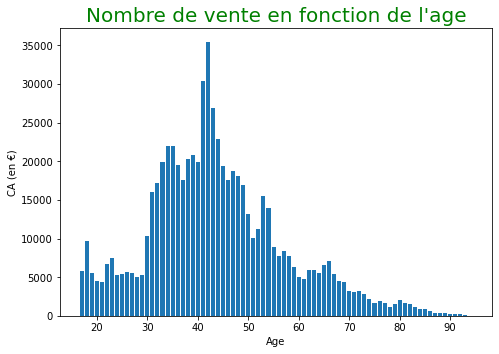

In [78]:
# Préparation de la figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Affichage des données
ax.bar(rep_age_vol.index, rep_age_vol['price'])
plt.xlabel('Age')
plt.ylabel('CA (en €)')
plt.title('Nombre de vente en fonction de l\'age', fontsize=20, color="green")

ax = plt.gca() 
plt.show() 

In [79]:
top10_age_vol =rep_age_vol['price'].sort_values(ascending=False).head(10)
top10_age_vol = pd.DataFrame(top10_age_vol)
top10_age_vol = top10_age_vol.rename({'price': 'Nombre de ventes'}, axis=1)
top10_age_vol

,Nombre de ventes
Age,
42.0,35491
41.0,30427
43.0,26826
44.0,22931
35.0,21965
34.0,21919
39.0,20867
38.0,20276
40.0,19943


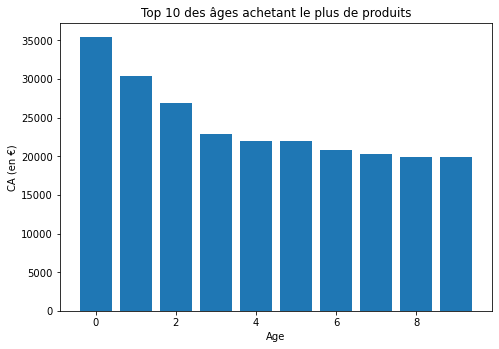

In [80]:
x_pos = np.arange(len(top10_age_vol.index))
height = top10_age_vol['Nombre de ventes']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x_pos,height)
ax.set_ylabel('CA (en €)')
labels_x = []

ax.set_xlabel('Age')
ax.set_title('Top 10 des âges achetant le plus de produits')

plt.show()

#### Par interval d'âge

In [81]:
interval_age_CA = df_finale.groupby(pd.cut(df_finale["Age"], np.arange(10, 100 +10, 10))).sum()
interval_age_CA

,price,categ,Annee,Mois,Jour,Age,date2,birth2,Age2
Age,,,,,,,,,
"(10, 20]",1.022540e+06,29830.0,51226015,164460,405130,464668.0,51226015,50761721,464294
"(20, 30]",2.340712e+06,67343.0,123230054,397259,963076,1570198.0,123230054,121660830,1569224
"(30, 40]",2.603284e+06,47904.0,394726197,1278200,3068844,6955109.0,394726197,387775933,6950264
"(40, 50]",2.905079e+06,53885.0,443717371,1429447,3472793,9814610.0,443717371,433910217,9807154
"(50, 60]",1.585152e+06,53276.0,191641662,611272,1487531,5192263.0,191641662,186453487,5188175
"(60, 70]",8.951315e+05,30512.0,107717463,344474,837140,3474079.0,107717463,104245976,3471487
"(70, 80]",3.551312e+05,12231.0,43224008,137250,335781,1598889.0,43224008,41626350,1597658
"(80, 90]",1.397869e+05,4801.0,16752255,52720,130604,695109.0,16752255,16057733,694522
"(90, 100]",9.504490e+03,353.0,1150441,3534,8017,52335.0,1150441,1098150,52291


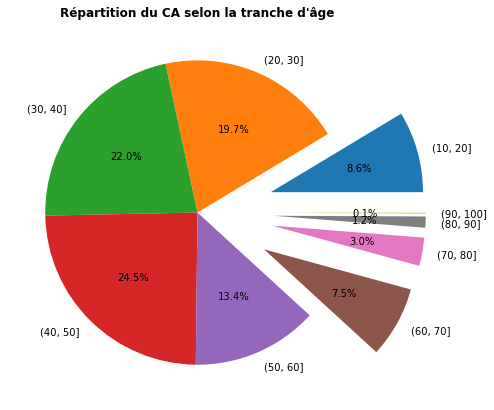

In [82]:
explode = (0.5, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5)
fig = plt.figure(figsize =(15, 7))
plt.pie(interval_age_CA['price'], labels = interval_age_CA.index, autopct='%1.1f%%', explode=explode)
plt.title('Répartition du CA selon la tranche d\'âge', fontweight ="bold")
plt.show()

In [83]:
interval_age_vol = df_finale.groupby(pd.cut(df_finale["Age"], np.arange(10, 100 +10, 10))).count()
interval_age_vol

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2,Age2
Age,,,,,,,,,,,,,,,
"(10, 20]",25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339
"(20, 30]",60956,60956,60956,60956,60956,60956,60956,60956,60956,60956,60956,60956,60956,60956,60956
"(30, 40]",195249,195249,195249,195249,195249,195249,195249,195249,195249,195249,195249,195249,195249,195249,195249
"(40, 50]",219480,219480,219480,219480,219480,219480,219480,219480,219480,219480,219480,219480,219480,219480,219480
"(50, 60]",94792,94792,94792,94792,94792,94792,94792,94792,94792,94792,94792,94792,94792,94792,94792
"(60, 70]",53281,53281,53281,53281,53281,53281,53281,53281,53281,53281,53281,53281,53281,53281,53281
"(70, 80]",21380,21380,21380,21380,21380,21380,21380,21380,21380,21380,21380,21380,21380,21380,21380
"(80, 90]",8286,8286,8286,8286,8286,8286,8286,8286,8286,8286,8286,8286,8286,8286,8286
"(90, 100]",569,569,569,569,569,569,569,569,569,569,569,569,569,569,569


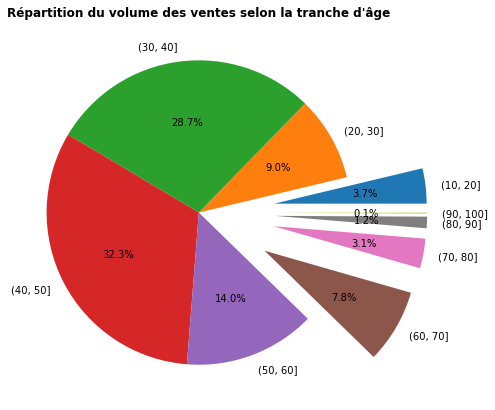

In [84]:
explode = (0.5, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5)
fig = plt.figure(figsize =(15, 7))
plt.pie(interval_age_vol['price'], labels = interval_age_vol.index, autopct='%1.1f%%', explode = explode)
plt.title('Répartition du volume des ventes selon la tranche d\'âge', fontweight ="bold")
plt.show()

### 3. Sexe

#### Analyse par Valeur puis volume

In [85]:
rep_sexe_CA = df_finale.groupby('sex').sum()['price']
rep_sexe_CA

sex
f    5.861055e+06
m    5.995265e+06
Name: price, dtype: float64

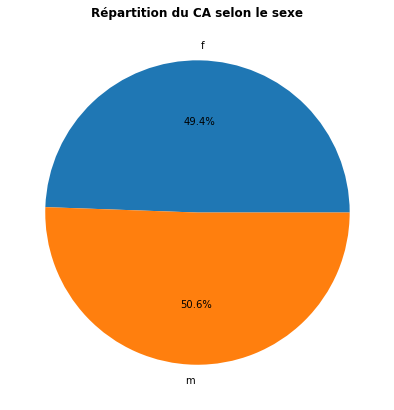

In [86]:
fig = plt.figure(figsize =(15, 7))
plt.pie(rep_sexe_CA, labels = rep_sexe_CA.index, autopct='%1.1f%%')
plt.title('Répartition du CA selon le sexe', fontweight ="bold")
plt.show()

In [87]:
rep_sexe_vol = df_finale.groupby('sex').count()['price']
rep_sexe_vol

sex
f    338402
m    340930
Name: price, dtype: int64

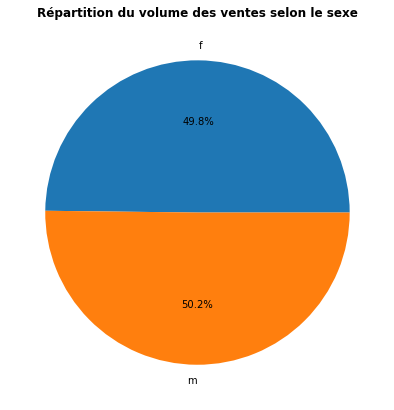

In [88]:
fig = plt.figure(figsize =(15, 7))
plt.pie(rep_sexe_vol, labels = rep_sexe_vol.index, autopct='%1.1f%%')
plt.title('Répartition du volume des ventes selon le sexe', fontweight ="bold")
plt.show()

### 4. Profile type d'un client

In [89]:
nb_client = df_finale.groupby('client_id').sum()
nb_client2 = len(nb_client.index)

In [90]:
nb_produit_achete_moy = len(df_finale.index)/(nb_client2*2)
print('Un client achète en moyenne dans l\'année', nb_produit_achete_moy, 'produits.')

Un client achète en moyenne dans l'année 39.49604651162791 produits.


In [91]:
df_finale['price'].sum()

11856320.408925945

In [92]:
pannier_moyen = df_finale['price'].sum()/(nb_client2*2)
print('Le pannier moyen d\'un client sur une année est de', pannier_moyen, '€')

Le pannier moyen d'un client sur une année est de 689.3209540073224 €


In [93]:
prix_moyen_produit = pannier_moyen/nb_produit_achete_moy
print('Soit une moyenne de', prix_moyen_produit, '€ par produit.')

Soit une moyenne de 17.45291022493559 € par produit.


### 5. Répartition du CA : Courbe de Lorenz

#### a. Mise en place du DF et nettoyage

In [94]:
client_lorenz = df_finale.groupby('client_id').sum()['price'].sort_values()
client_lorenz = pd.DataFrame(client_lorenz)
client_lorenz

,price
client_id,
c_8351,6.310000
c_8140,8.300000
c_8114,9.980000
c_240,11.060000
c_4648,11.200000
...,...
c_3263,5276.870000
c_3454,113673.111841
c_6714,153669.283681


On constate que les 4 derniers clients ont un CA nettement plus élevé que le reste des clients.   
**Pour cette raison on décidera de les enlever du DF, car considéré comme appartenant à des entreprises.**

In [95]:
client_lorenz.drop(["c_3454", "c_6714", "c_4958", "c_1609"], axis=0, inplace=True)

#### b. Création de la courbe de Lorenz

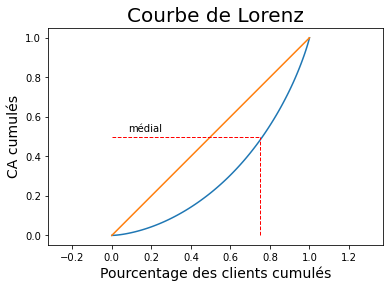

In [96]:
n_client = len(client_lorenz)
lorenz = np.cumsum(client_lorenz) / client_lorenz.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')

xaxis = np.linspace(0-1/n_client,1+1/n_client,n_client+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot(xaxis, xaxis,drawstyle='steps-post')
plt.plot([0.0, 0.75], [0.5, 0.5], 'r--' ,linewidth=1)
plt.plot([0.75, 0.75], [0.0, 0.5], 'r--', linewidth=1)

plt.figtext(0.35,.52,'médial',fontsize=10,ha='center')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.title('Courbe de Lorenz', fontsize=20)
ax = plt.gca()
ax.set_xlim(xmin=0)
plt.xlim(xmin=0.0)
plt.show()

#### Calcul du coefficient de Gini

In [97]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n_client # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('Le coefficient de Gini est de:', gini, 'soit une population moyennement inégalitaire.')

Le coefficient de Gini est de: 0.40263246580652967 soit une population moyennement inégalitaire.


#### Deuxième cas de figures:
Dans ce deuxième cas de figure, les outliers (données >100k€) précédement supprimés, sont réintégrés dans notre DF.

In [98]:
client_lorenz2 = df_finale.groupby('client_id').sum()['price'].sort_values()
client_lorenz2 = pd.DataFrame(client_lorenz2)
client_lorenz2

,price
client_id,
c_8351,6.310000
c_8140,8.300000
c_8114,9.980000
c_240,11.060000
c_4648,11.200000
...,...
c_3263,5276.870000
c_3454,113673.111841
c_6714,153669.283681


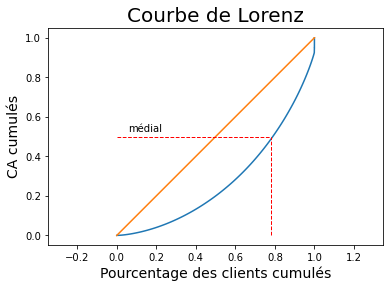

In [99]:
n2 = len(client_lorenz2)
lorenz2 = np.cumsum(client_lorenz2) / client_lorenz2.sum()
lorenz2 = np.append([0],lorenz2) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')

plt.xlim(0.0,1.0) #ici problème!!

ax = plt.gca() 
ax.set_xlim([0.0, 1.0]) 


xaxis = np.linspace(0-1/n2,1+1/n2,n2+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz2,drawstyle='steps-post')
plt.plot(xaxis, xaxis,drawstyle='steps-post')
plt.plot([0.0, 0.78], [0.5, 0.5], 'r--' ,linewidth=1, )
plt.plot([0.78, 0.78], [0.0, 0.5], 'r--', linewidth=1)

plt.figtext(0.35,.52,'médial',fontsize=10,ha='center')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.title('Courbe de Lorenz', fontsize=20)
plt.show()

In [100]:
AUC2 = (lorenz2.sum() -lorenz2[-1]/2 -lorenz2[0]/2)/n2 # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S2 = 0.5 - AUC2 # surface entre la première bissectrice et le courbe de Lorenz
gini2 = 2*S2
print('Le coefficient de Gini est de:', gini2, ', ce qui est légèrement plus inégalitaire que dans le premier cas (sans outliers).')

Le coefficient de Gini est de: 0.4463965830356027 , ce qui est légèrement plus inégalitaire que dans le premier cas (sans outliers).


# III. Analyse bivariée: 2eme partie

## A. Sexe et catégories de livre :

Comme nous souhaitons analyser **2 variables qualitatives,** il nous faut passer par un test du **chi-2.**

### 1. Tableau de contingence:

In [101]:
outliers = df_finale[df_finale['client_id'].isin(["c_3454", "c_6714", "c_4958", "c_1609"])]
df_finale2 = df_finale.drop(outliers.index)
df_finale2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2,Age2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01,2022,5,20,36.0,2022,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01,2022,2,2,34.0,2022,1988,34
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24,21.0,2021,2000,21
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01,2023,1,11,43.0,2023,1980,43
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972-01-01,2022,10,20,50.0,2022,1972,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01,2022,1,15,71.0,2022,1951,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01,2022,3,19,45.0,2022,1977,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01,2022,12,20,34.0,2022,1988,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01,2021,7,16,35.0,2021,1986,35


In [102]:
X = "categ"
Y = "sex"

cont = df_finale2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0.0,200904,186589,387493
1.0,111331,101017,212348
2.0,16980,15868,32848
Total,329215,303474,632689


Ainsi, avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:  
H0: les deux variables sont indépedantes  
H1: les deux variable ne sont pas indépendantes

### 2. Représentation graphique du tableau de contingence

<AxesSubplot:xlabel='categ'>

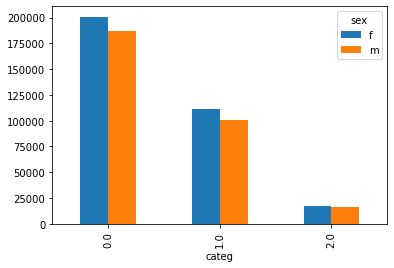

In [103]:
cont_graph = cont.iloc[:-1, :-1]
cont_graph.plot(kind='bar')

### 3. Heatmap et sources de la non-indépendance: ξij et ξn

In [104]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_finale2)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
print('Dans notre cas nous avons un chi-2 de',xi_n, 'reparti comme ci-dessous:')
measure

Dans notre cas nous avons un chi-2 de 20.200173796862927 reparti comme ci-dessous:


sex,f,m,Total
categ,,,
0.0,2.607546,2.828720,0.0
1.0,6.344940,6.883125,0.0
2.0,0.736678,0.799164,0.0
Total,0.000000,0.000000,0.0


In [105]:
print('La contribution à la non-indépendance des 2 variables est telle quelle:')
table

La contribution à la non-indépendance des 2 variables est telle quelle:


sex,f,m,Total
categ,,,
0.0,0.129085,0.140034,0.0
1.0,0.314103,0.340746,0.0
2.0,0.036469,0.039562,0.0
Total,0.000000,0.000000,0.0


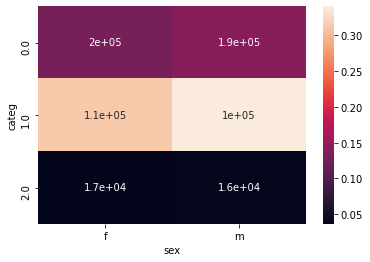

In [106]:
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

On constate que les données de la catégorie 0 sont sources de non indépendance à presque 30% du total et celles de la catégorie 1 comptent pour presque 65% du total de la non-indépendance.

### 3. P-value

In [107]:
from scipy import stats

In [108]:
stats.chi2_contingency(cont.iloc[:-1, :-1])

(20.200173796862927,
 4.1075985631484716e-05,
 2,
 array([[201629.09106212, 185863.90893788],
        [110493.69725094, 101854.30274906],
        [ 17092.21168694,  15755.78831306]]))

Notre p-value étant de 4.1075985631484716e-05, donc **alpha > p-value**  
Par conséquent, nous sommes en mesure de **rejeter H0** et de conclure que **les variables sexe et catégorie de produits sont convergantes.**

## B. Age & Montant total d'achat:

### 1. Analyse préliminaire:

Nous avons ici affaire à **2 variables quantitatives**, par conséquent nous devrons donc utiliser une **régression linéaire** pour l'analyse.

#### Distributions des variables:

In [154]:
df_finale2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2,Age2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986-01-01,2022,5,20,36.0,2022,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988-01-01,2022,2,2,34.0,2022,1988,34
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24,21.0,2021,2000,21
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980-01-01,2023,1,11,43.0,2023,1980,43
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,8.57,0.0,f,1972-01-01,2022,10,20,50.0,2022,1972,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951-01-01,2022,1,15,71.0,2022,1951,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977-01-01,2022,3,19,45.0,2022,1977,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988-01-01,2022,12,20,34.0,2022,1988,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986-01-01,2021,7,16,35.0,2021,1986,35


In [109]:
clients = df_finale2.groupby(['Age2']).sum()['price']
clients = pd.DataFrame(clients)
clients

,price
Age2,
17,241265.83000
18,384592.43000
19,221911.82728
20,177128.73456
21,172103.47728
...,...
90,4114.03000
91,3455.02000
92,3309.62000


<AxesSubplot:>

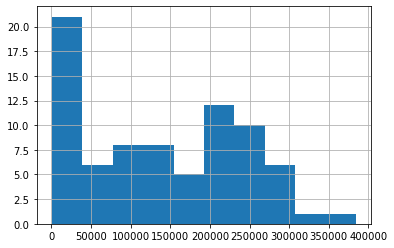

In [110]:
clients['price'].hist()

<AxesSubplot:>

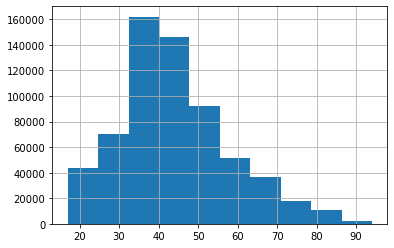

In [111]:
df_finale2['Age'].hist()

In [112]:
print('La covariance est de:', np.cov(clients.index, clients['price'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(clients.index, clients['price'])[0])

La covariance est de: -2034734.2544281413
Le coefficient de corrélation linéaire est de: -0.886283584708708


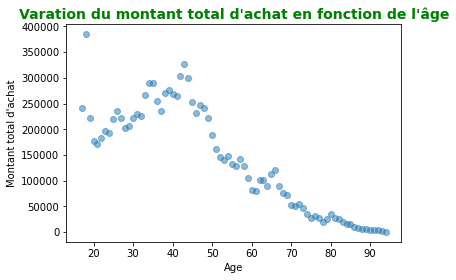

In [113]:
plt.plot(clients.index, clients['price'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Montant total d'achat")
plt.title('Varation du montant total d\'achat en fonction de l\'âge', color='g', fontsize= 14, fontweight ="bold")
plt.show()

Nous observons 2 phases sur ce graphique:
- de 20 à 45 ans: une tendances croissante passant de 170k à 300k
- de 45 à 90 ans: une tendances décroissante passant de 300k à 0k

**Globalement, la tendance est plutôt négative comme nous le confirme le coefficient de -0,88.**

### 2. Régression linéaire:

#### a. Calculs (méthode 1):

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
x = np.array(clients.index).reshape((-1, 1))
y = np.array(clients['price'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient de determination, R²:', r_sq)

coefficient de determination, R²: 0.7854985925241174


In [116]:
a = model.coef_
b = model.intercept_
print('intercept:', b)
print('slope:', a)

intercept: 363481.2893610519
slope: [-4013.94230694]


In [117]:
y_pred = model.intercept_ + model.coef_ * x.reshape(-1)
print('predicted responses:', y_pred, sep='\n')

predicted responses:
[295244.27014301 291230.32783607 287216.38552912 283202.44322218
 279188.50091524 275174.55860829 271160.61630135 267146.67399441
 263132.73168746 259118.78938052 255104.84707358 251090.90476663
 247076.96245969 243063.02015275 239049.0778458  235035.13553886
 231021.19323191 227007.25092497 222993.30861803 218979.36631108
 214965.42400414 210951.4816972  206937.53939025 202923.59708331
 198909.65477637 194895.71246942 190881.77016248 186867.82785554
 182853.88554859 178839.94324165 174826.0009347  170812.05862776
 166798.11632082 162784.17401387 158770.23170693 154756.28939999
 150742.34709304 146728.4047861  142714.46247916 138700.52017221
 134686.57786527 130672.63555833 126658.69325138 122644.75094444
 118630.80863749 114616.86633055 110602.92402361 106588.98171666
 102575.03940972  98561.09710278  94547.15479583  90533.21248889
  86519.27018195  82505.327875    78491.38556806  74477.44326112
  70463.50095417  66449.55864723  62435.61634028  58421.67403334
  54

#### b. Représentation graphique

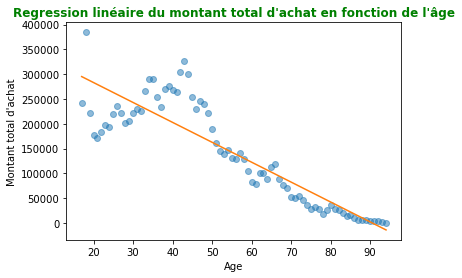

In [118]:
plt.plot(clients.index, clients['price'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Montant total d'achat")
plt.title('Regression linéaire du montant total d\'achat en fonction de l\'âge', color='g', fontsize= 12, fontweight ="bold")
plt.plot(clients.index, a*x + b)
plt.show()

**Pour conclure, il existe bien une corrélation négative entre nos 2 variables.**

## C. Age & fréquence d'achat

### 1. Mise en place du DataFrame

Étant donné qu'encore une fois les deux variables sont quantitatives, l'analyse se fera via une **regréssion linéaire.**

In [119]:
age_freq = df_finale2.groupby(['Age2']).count()
age_freq = pd.DataFrame(age_freq)
age_freq

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2
Age2,,,,,,,,,,,,,,
17,5935,5935,5935,5935,5935,5935,5935,5935,5935,5935,5935,5935,5935,5935
18,9636,9636,9636,9636,9636,9636,9636,9636,9636,9636,9636,9636,9636,9636
19,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409
20,4432,4432,4432,4432,4432,4432,4432,4432,4432,4432,4432,4432,4432,4432
21,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,243,243,243,243,243,243,243,243,243,243,243,243,243,243
91,210,210,210,210,210,210,210,210,210,210,210,210,210,210
92,196,196,196,196,196,196,196,196,196,196,196,196,196,196


In [120]:
age_freq2 = df_finale2.reset_index().groupby('Age')['client_id'].nunique()

In [121]:
age_freq['nb_client_unique'] = age_freq2
age_freq = age_freq.loc[:,['id_prod', 'nb_client_unique']]
age_freq['nb_achat_par_client'] = age_freq['id_prod']/age_freq['nb_client_unique']
age_freq['nb_achat_par_client'] = age_freq['nb_achat_par_client']/2
age_freq

,id_prod,nb_client_unique,nb_achat_par_client
Age2,,,
17,5935,435,6.821839
18,9636,573,8.408377
19,5409,614,4.404723
20,4432,372,5.956989
21,4306,360,5.980556
...,...,...,...
90,243,16,7.593750
91,210,13,8.076923
92,196,11,8.909091


Nous obtenous un DF avec **"le nombre d'achat par client par an".**

<AxesSubplot:>

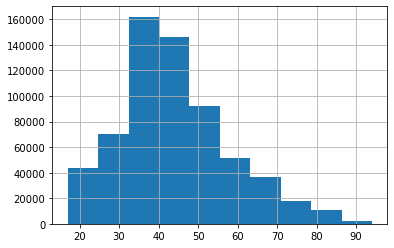

In [122]:
df_finale2['Age'].hist()

<AxesSubplot:>

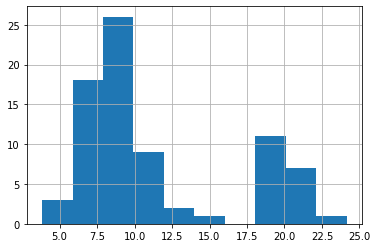

In [123]:
age_freq['nb_achat_par_client'].hist()

### 2. Représentation graphique:

In [124]:
print('La covariance est de:', np.cov(age_freq.index, age_freq['nb_achat_par_client'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_freq.index, age_freq['nb_achat_par_client'])[0])

La covariance est de: -33.518039403486135
Le coefficient de corrélation linéaire est de: -0.281231694031161


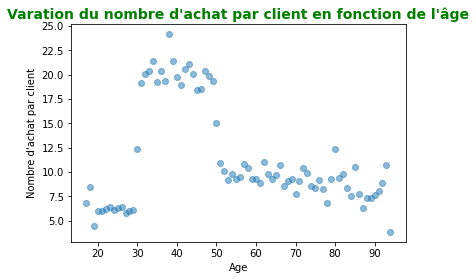

In [125]:
plt.plot(age_freq.index, age_freq['nb_achat_par_client'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Nombre d\'achat par client")
plt.title('Varation du nombre d\'achat par client en fonction de l\'âge', color='g', fontsize= 14, fontweight ="bold")
plt.show()

On constate 3 principaux groupes de points:  
- de 20 à 30 ans: une tendance basse autour de 12 achats/clients
- de 30 à 50 ans: une tendance haute autour de 40 achats/clients
- de 50 à 90 ans: une tendance moyenne et légèrement décroissante autour de 20 achats/clients

**De manière générale on constate une corrélation légèrement négative qui nous est confirmé par le coefficient de corrélation de -0,28.**

### 3. Régression linéaire:

In [126]:
x = np.array(age_freq.index).reshape((-1, 1))
y = np.array(age_freq['nb_achat_par_client'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

a = model.coef_
b = model.intercept_
print('coefficient de determination, R²:', r_sq)
print('intercept:', b)
print('slope:', a)

coefficient de determination, R²: 0.07909126572763658
intercept: 15.058040756469966
slope: [-0.0661214]


In [127]:
y_pred = model.intercept_ + model.coef_ * x.reshape(-1)
print('predicted responses:', y_pred, sep='\n')

predicted responses:
[13.93397697 13.86785557 13.80173417 13.73561277 13.66949137 13.60336997
 13.53724857 13.47112717 13.40500577 13.33888437 13.27276297 13.20664157
 13.14052017 13.07439877 13.00827737 12.94215597 12.87603457 12.80991318
 12.74379178 12.67767038 12.61154898 12.54542758 12.47930618 12.41318478
 12.34706338 12.28094198 12.21482058 12.14869918 12.08257778 12.01645638
 11.95033498 11.88421358 11.81809218 11.75197078 11.68584938 11.61972799
 11.55360659 11.48748519 11.42136379 11.35524239 11.28912099 11.22299959
 11.15687819 11.09075679 11.02463539 10.95851399 10.89239259 10.82627119
 10.76014979 10.69402839 10.62790699 10.56178559 10.49566419 10.4295428
 10.3634214  10.2973     10.2311786  10.1650572  10.0989358  10.0328144
  9.966693    9.9005716   9.8344502   9.7683288   9.7022074   9.636086
  9.5699646   9.5038432   9.4377218   9.3716004   9.305479    9.23935761
  9.17323621  9.10711481  9.04099341  8.97487201  8.90875061  8.84262921]


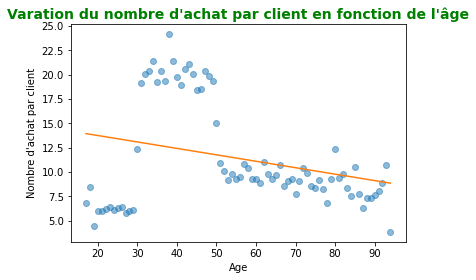

In [128]:
plt.plot(age_freq.index, age_freq['nb_achat_par_client'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Nombre d\'achat par client")
plt.title('Varation du nombre d\'achat par client en fonction de l\'âge', color='g', fontsize= 14, fontweight ="bold")
plt.plot(age_freq.index, a*x + b)
plt.show()

Ainsi la régréssion linéaire confirme nos observations: **nous avons une corrélation légèrement négative de nos 2 variables.**

### 4. Test de Spearman

In [129]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

spearman, p_value = spearmanr(age_freq.index, age_freq['nb_achat_par_client'])
print('Notre coefficient de Spearman est de:', spearman)

Notre coefficient de Spearman est de: -0.10613437195715676


On peut donc conclure à **une faible corrélation négative entre l'âge et la fréquence d'achat!**

## D. Age & Panier moyen

### 1. Analyse préliminaire

Nous avons affaire à 2 variables

In [130]:
pannier_moy = df_finale2.groupby(['Age2']).mean()['price']
pannier_moy = pd.DataFrame(pannier_moy)
pannier_moy

,price
Age2,
17,40.651361
18,39.912041
19,41.026405
20,39.965870
21,39.968295
...,...
90,16.930165
91,16.452476
92,16.885816


<AxesSubplot:>

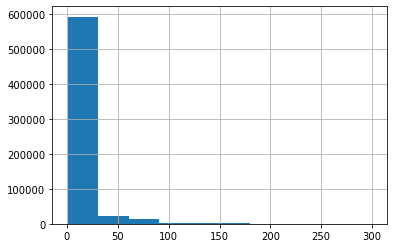

In [131]:
df_finale2['price'].hist()

<AxesSubplot:>

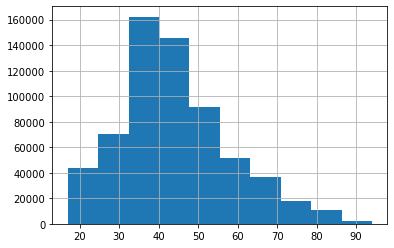

In [132]:
df_finale2['Age2'].hist()

In [133]:
print('La covariance est de:', np.cov(pannier_moy.index, pannier_moy['price'],ddof=0)[1,0])
pearson, pvalue =  stats.pearsonr(pannier_moy.index, pannier_moy['price'])
print('Le coefficient de corrélation linéaire est de:', pearson)

La covariance est de: -114.69495406624821
Le coefficient de corrélation linéaire est de: -0.5499114079058678


Nos 2 variables sont donc moyennement négativement corrélés.

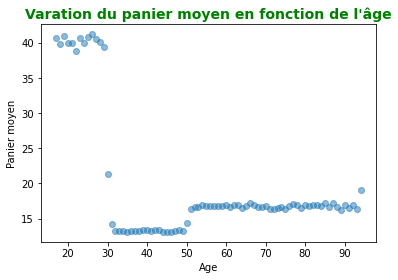

In [134]:
plt.plot(pannier_moy.index, pannier_moy['price'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.title('Varation du panier moyen en fonction de l\'âge', color='g', fontsize= 14, fontweight ="bold")
plt.show()

Nous observation 3 principaux groupes de points:
- de 17 à 30 ans: le pannier moyen est stable autour de 40€
- de 30 à 50 ans: le pannier moyen est stable autour de 5€
- de 50 à 90 ans: le pannier moyen est stable autour de 15€

Avec des tendances si diverses, il est difficile via l'observation d'établir une tendance globale.

### 2. Régression linéaire:

In [135]:
x2 = np.array(pannier_moy.index).reshape((-1, 1))
y2 = np.array(pannier_moy['price'])
model2 = LinearRegression().fit(x2, y2)
r_sq = model2.score(x2, y2)
print('coefficient de determination, R²:', r_sq)

coefficient de determination, R²: 0.3024025565450139


In [136]:
a2 = model2.coef_
b2 = model2.intercept_
print('intercept:', b2)
print('slope:', a2)

intercept: 32.4346673924285
slope: [-0.22625998]


In [137]:
y_pred = model2.intercept_ + model.coef_ * x.reshape(-1)
print('predicted responses:', y_pred, sep='\n')

predicted responses:
[31.3106036  31.2444822  31.1783608  31.1122394  31.046118   30.9799966
 30.91387521 30.84775381 30.78163241 30.71551101 30.64938961 30.58326821
 30.51714681 30.45102541 30.38490401 30.31878261 30.25266121 30.18653981
 30.12041841 30.05429701 29.98817561 29.92205421 29.85593281 29.78981141
 29.72369002 29.65756862 29.59144722 29.52532582 29.45920442 29.39308302
 29.32696162 29.26084022 29.19471882 29.12859742 29.06247602 28.99635462
 28.93023322 28.86411182 28.79799042 28.73186902 28.66574762 28.59962622
 28.53350482 28.46738343 28.40126203 28.33514063 28.26901923 28.20289783
 28.13677643 28.07065503 28.00453363 27.93841223 27.87229083 27.80616943
 27.74004803 27.67392663 27.60780523 27.54168383 27.47556243 27.40944103
 27.34331963 27.27719824 27.21107684 27.14495544 27.07883404 27.01271264
 26.94659124 26.88046984 26.81434844 26.74822704 26.68210564 26.61598424
 26.54986284 26.48374144 26.41762004 26.35149864 26.28537724 26.21925584]


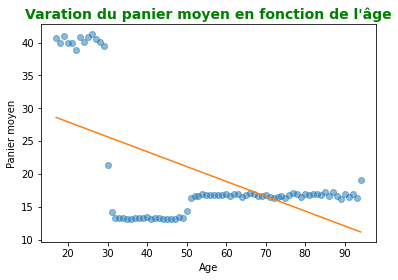

In [138]:
plt.plot(pannier_moy.index, pannier_moy['price'],'o',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.title('Varation du panier moyen en fonction de l\'âge', color='g', fontsize= 14, fontweight ="bold")
plt.plot(pannier_moy.index, a2*x2+b2)
plt.show()

### 3. Test de spearmon:

In [139]:
spearman, p_value = spearmanr(pannier_moy.index, pannier_moy['price'])
print('Notre coefficient de Spearman est de:', spearman)

Notre coefficient de Spearman est de: -0.0659214203518001


Nous pouvons donc conclure à **une corrélation moyennement négative entre l'age et le pannier moyen.**

## E. Age & catégorie de livre

### 1.  Mise en place du DF

Étant donné que nous étudions une variable **quantitative** (âge) ainsi qu'une variable **qualitative** (catégorie), il nous faudra passer par une **ANOVA** pour déterminer l'existance ou non de corrélation.

In [140]:
vente_categ = df_finale2.groupby(['Age2', 'categ']).count()['price'] #nb de vente par catégorie pour chaque âge
vente_categ = pd.DataFrame(vente_categ)
vente_categ = vente_categ.reset_index()
vente_categ

,Age2,categ,price
0,17,0.0,1400
1,17,1.0,2150
2,17,2.0,2385
3,18,0.0,2118
4,18,1.0,3721
...,...,...,...
228,93,0.0,41
229,93,1.0,88
230,94,0.0,11
231,94,1.0,11


In [141]:
vente_categ_0 = vente_categ[vente_categ['categ'] == 0.0]
vente_categ_1 = vente_categ[vente_categ['categ'] == 1.0]
vente_categ_2 = vente_categ[vente_categ['categ'] == 2.0]
vente_categ_0

,Age2,categ,price
0,17,0.0,1400
3,18,0.0,2118
6,19,0.0,1161
9,20,0.0,992
12,21,0.0,1053
...,...,...,...
219,90,0.0,92
222,91,0.0,95
225,92,0.0,68
228,93,0.0,41


### 2. Représentation graphique:

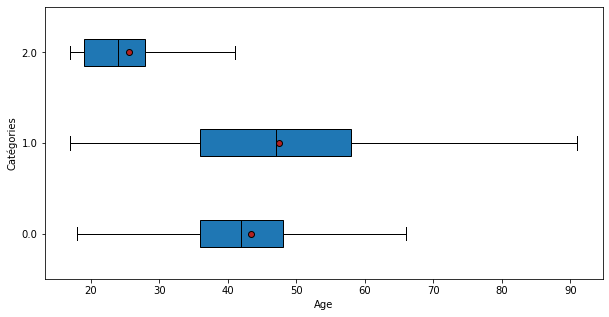

In [142]:
X = "categ" # qualitative
Y = "Age2" # quantitative

# On ne garde que les dépenses
sous_echantillon = df_finale2.copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


fig = plt.figure(figsize= (10, 5))    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.ylabel("Catégories")
plt.xlabel("Age")
plt.show()

### 3. Anova: calcul:

#### a. Eta²

In [143]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [144]:
eta_squared(df_finale2['categ'], df_finale2['Age2'])

0.11330750071111796

In [145]:
print('Ainsi, le rapport de corrélation de nous indique que ces 2 variables sont faiblement corrélés, de l\'ordre de 10%.')

Ainsi, le rapport de corrélation de nous indique que ces 2 variables sont faiblement corrélés, de l'ordre de 10%.


#### b. p-value:

Nos hypothèses seront les-suivantes:  
H0: absence de différence de moyenne dans les différents groupes  
H1: différence de moyenne dans les différents groupes

In [146]:
vente_categ2_0 = df_finale2[df_finale2['categ'] == 0.0]
vente_categ2_1 = df_finale2[df_finale2['categ'] == 1.0]
vente_categ2_2 = df_finale2[df_finale2['categ'] == 2.0]
vente_categ2_2

,id_prod,date,session_id,client_id,price,categ,sex,birth,Annee,Mois,Jour,Age,date2,birth2,Age2
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000-01-01,2021,6,24,21.0,2021,2000,21
18,2_62,2021-09-20 08:03:08.084039,s_92657,c_6084,60.96,2.0,m,2002-01-01,2021,9,20,19.0,2021,2002,19
33,2_112,2021-07-07 22:08:01.757045,s_59270,c_826,67.57,2.0,f,2004-01-01,2021,7,7,17.0,2021,2004,17
39,2_116,2022-08-23 16:37:06.987711,s_257395,c_589,46.31,2.0,m,2004-01-01,2022,8,23,18.0,2022,2004,18
55,2_155,2022-06-16 07:56:26.157260,s_224607,c_4002,46.99,2.0,f,1994-01-01,2022,6,16,28.0,2022,1994,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679183,2_79,2022-09-13 03:50:19.449637,s_267243,c_7520,55.99,2.0,f,1997-01-01,2022,9,13,25.0,2022,1997,25
679207,2_222,2022-08-04 23:17:39.599956,s_248460,c_7718,103.58,2.0,f,1994-01-01,2022,8,4,28.0,2022,1994,28
679237,2_62,2021-05-06 17:31:13.237898,s_30789,c_2589,60.96,2.0,f,2004-01-01,2021,5,6,17.0,2021,2004,17
679241,2_43,2021-05-22 09:25:33.450377,s_37904,c_5278,69.99,2.0,f,2004-01-01,2021,5,22,17.0,2021,2004,17


In [147]:
fvalue, pvalue = stats.f_oneway(vente_categ2_0['Age2'], vente_categ2_1['Age2'], vente_categ2_2['Age2'])
print(fvalue, pvalue)

40424.425295357185 0.0


In [148]:
fvalue, pvalue = stats.f_oneway(vente_categ2_0['Age2'], vente_categ2_1['Age2'], vente_categ2_2['Age2'])
print(fvalue, pvalue)

40424.425295357185 0.0


**Deuxième méthode:**

In [149]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age2 ~ categ', data=df_finale2).fit()
anova_table = sm.stats.anova_lm(model, typ=2) #modifier ici selon le nombre de facteur (one/two way)
anova_table

,sum_sq,df,F,PR(>F)
categ,8.310488e+05,1.0,4354.337653,0.0
Residual,1.207517e+08,632687.0,NaN,NaN


On peut conclure que comme notre p-value < 0,05, **il y a des différences significatives parmis les catégories.**

### 3. Validité de l'ANOMA:
- l’indépendance entre les échantillons de chaque groupe
- l’égalité des variances ==> test de Bartlett   
- la normalité des résidus ==> test de Shapiro.

Dans notre cas acheter une certaine catégorie de produit ne présage pas de l'achat d'une autre catégorie, donc il y a indépendance des ces 3 groupes.

#### a. Egalité des variances

In [150]:
df_finale2.groupby("categ")['Age2'].agg('var')

categ
0.0    132.974335
1.0    249.834948
2.0     98.284149
Name: Age2, dtype: float64

In [151]:
from scipy.stats import bartlett
from scipy.stats import shapiro

In [152]:
bartlett(vente_categ2_0['Age2'],
        vente_categ2_1['Age2'],
        vente_categ2_2['Age2'])

BartlettResult(statistic=32896.605207324814, pvalue=0.0)

Donc nous avons une p-value < 0,05, nous pouvons donc conclure que nos variances ne sont pas égales.   
**Notre deuxième condition est donc remplie.**

#### b. Normalité des résidus:

H0 : Les résidus suivent une loi normale si p-value > 5%  
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [153]:
model = ols('Age2 ~ categ', data=df_finale2).fit()
shapiro(model.resid)

C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9659296870231628, pvalue=0.0)

Encore une fois, notre p-value < 0,05, donc **on peut rejeter l'hypothèse H0** qui stipule que les résidues suivent une loi normale.  
**Ainsi, nos 3 conditions sont validées pour effectuer notre ANOVA et cette dernière démontre une corrélation entre l'age et la categorie de livre**